In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
def display_cluster(X, km=[], num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    plt.gca().set_aspect('equal')
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0], alpha = alpha, s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ ==i, 0], X[km.labels_==i, 1], c = color[i], alpha = alpha, s = s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

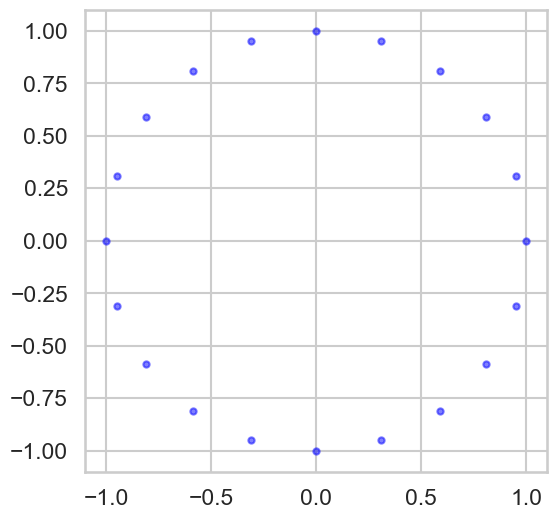

In [4]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)], [np.sin(angle)],0).transpose()

display_cluster(X)

In [25]:
df = pd.read_csv('C:\\Users\\scott\\Documents\\Project-To-Do\\Unsupervised Machine Learning County\\Data\\Country-data.csv')

## need to convert country values to a specific unique Ouput. 


df['health'] = df['health'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100


df['country'] = df['country'].astype('category')

df['country_coded'] = df['country'].cat.codes

df.head(5)

### Dataset for KMeans 

converted_dataframe = df.iloc[:,1:]

converted_dataframe.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_coded
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,4


In [6]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_coded
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


In [28]:
from sklearn.preprocessing import StandardScaler

df_reduced = df.drop(columns=['country_coded'])
df_reduced = df_reduced.set_index('country')


scaler = StandardScaler().fit(df_reduced)
dftrans = scaler.transform(df_reduced)

scaled_df = pd.DataFrame(dftrans, columns = df_reduced.columns, index=df_reduced.index[:])

scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns= [f"pc{i}" for i in range (1,10)], index = scaled_df.index)
pca.explained_variance_

array([5.33631081e+00, 1.67006556e+00, 8.97406142e-01, 5.49797220e-01,
       2.74267850e-01, 2.22718073e-01, 8.50864327e-02, 1.40921616e-02,
       4.47261467e-03])

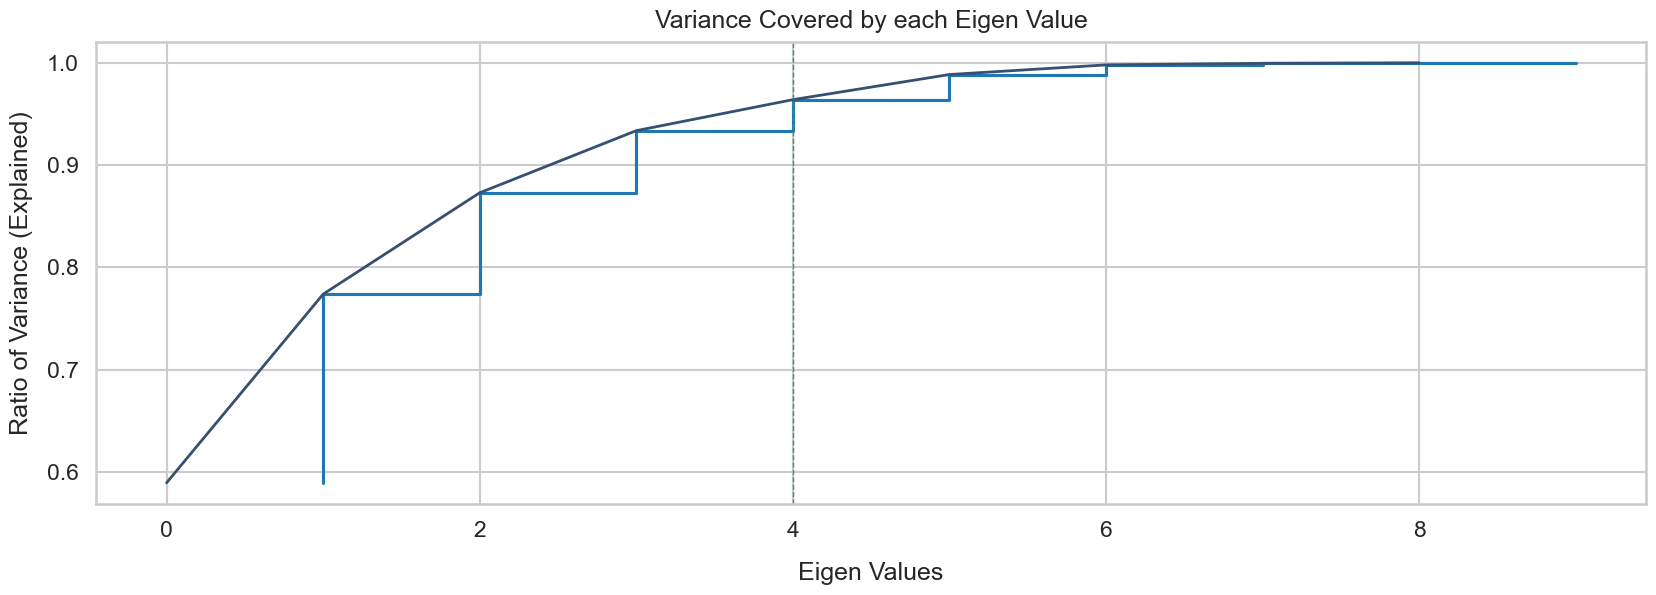

In [41]:
plt.figure(figsize=(20, 6))
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_)) # plot cusum of explained_variacne_ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="#355070", linewidth=2)
plt.axvline(x=4, color="#40916c", label='axvline-fullheight', ls='--', linewidth=1)
plt.xlabel('Eigen Values', labelpad=15)
plt.ylabel('Ratio of Variance (Explained)', labelpad=10)
plt.title('Variance Covered by each Eigen Value', pad=10)
plt.show()

In [44]:
pca_df.iloc[:,0:4]

,pc1,pc2,pc3,pc4
country,,,,
Afghanistan,-2.635575,1.472267,-0.549489,-0.242326
Albania,-0.024206,-1.429892,-0.014123,0.450645
Algeria,-0.459557,-0.675495,0.959355,0.218456
Angola,-2.722630,2.172332,0.600215,-0.433978
Antigua and Barbuda,0.648597,-1.023437,-0.257430,0.289201
...,...,...,...,...
Vanuatu,-1.175210,-0.275652,-0.667131,0.279628
Venezuela,-0.314228,-0.016266,3.680273,0.011835
Vietnam,-0.594449,-1.076335,0.528875,0.508854


In [45]:
reduced_pca_df = pca_df.iloc[:,0:4]

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0, 0.5, 'Intertia')

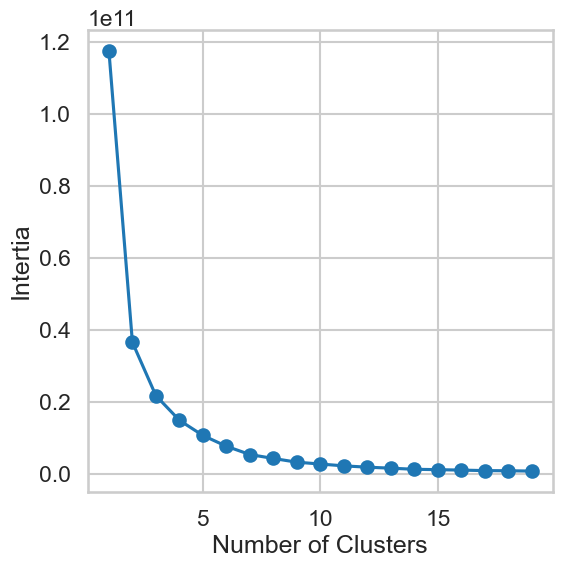

In [8]:
inetria = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(converted_dataframe)
    inetria.append(km.inertia_)
    
plt.plot(list_num_clusters, inetria)
plt.scatter(list_num_clusters, inetria)
plt.xlabel('Number of Clusters')
plt.ylabel("Intertia")

In [9]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [10]:
inetria

[117460075577.07817,
 36528776020.055435,
 21710595457.687176,
 14874767553.044214,
 10655762687.583176,
 7656107906.76514,
 5354145848.139883,
 4259274595.9924793,
 3230700274.6013794,
 2711420699.5474806,
 2205392966.2957044,
 1840005615.4906068,
 1562178488.3986843,
 1253557250.5732274,
 1150286057.308067,
 1025157449.5451198,
 888097885.5630459,
 845084625.4310772,
 753480804.9037443]

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0, 0.5, 'Intertia')

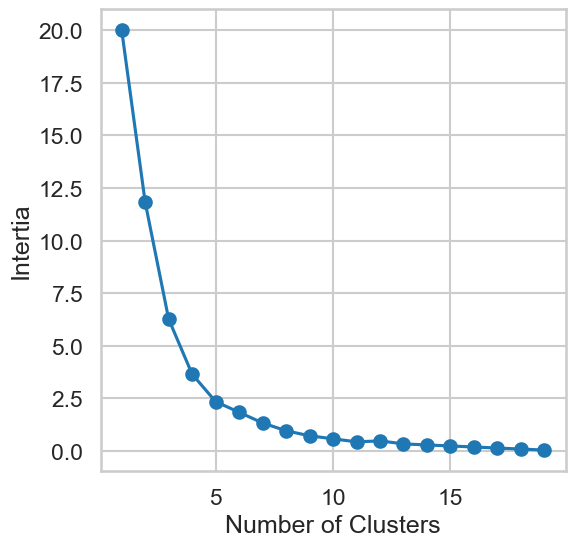

In [11]:
#Country by Exports and Imports 

X

inetria = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inetria.append(km.inertia_)
    
plt.plot(list_num_clusters, inetria)
plt.scatter(list_num_clusters, inetria)
plt.xlabel('Number of Clusters')
plt.ylabel("Intertia")

In [12]:
X

array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]])

In [13]:
num_clusters = 7
km =KMeans(n_clusters=num_clusters, random_state=10, n_init=1)

km.fit(converted_dataframe)

labels = km.labels_
centers = km.cluster_centers_

resulting_df = converted_dataframe

resulting_df['Clusters'] = labels
#display_cluster(converted_dataframe, km, num_clusters=num_clusters)

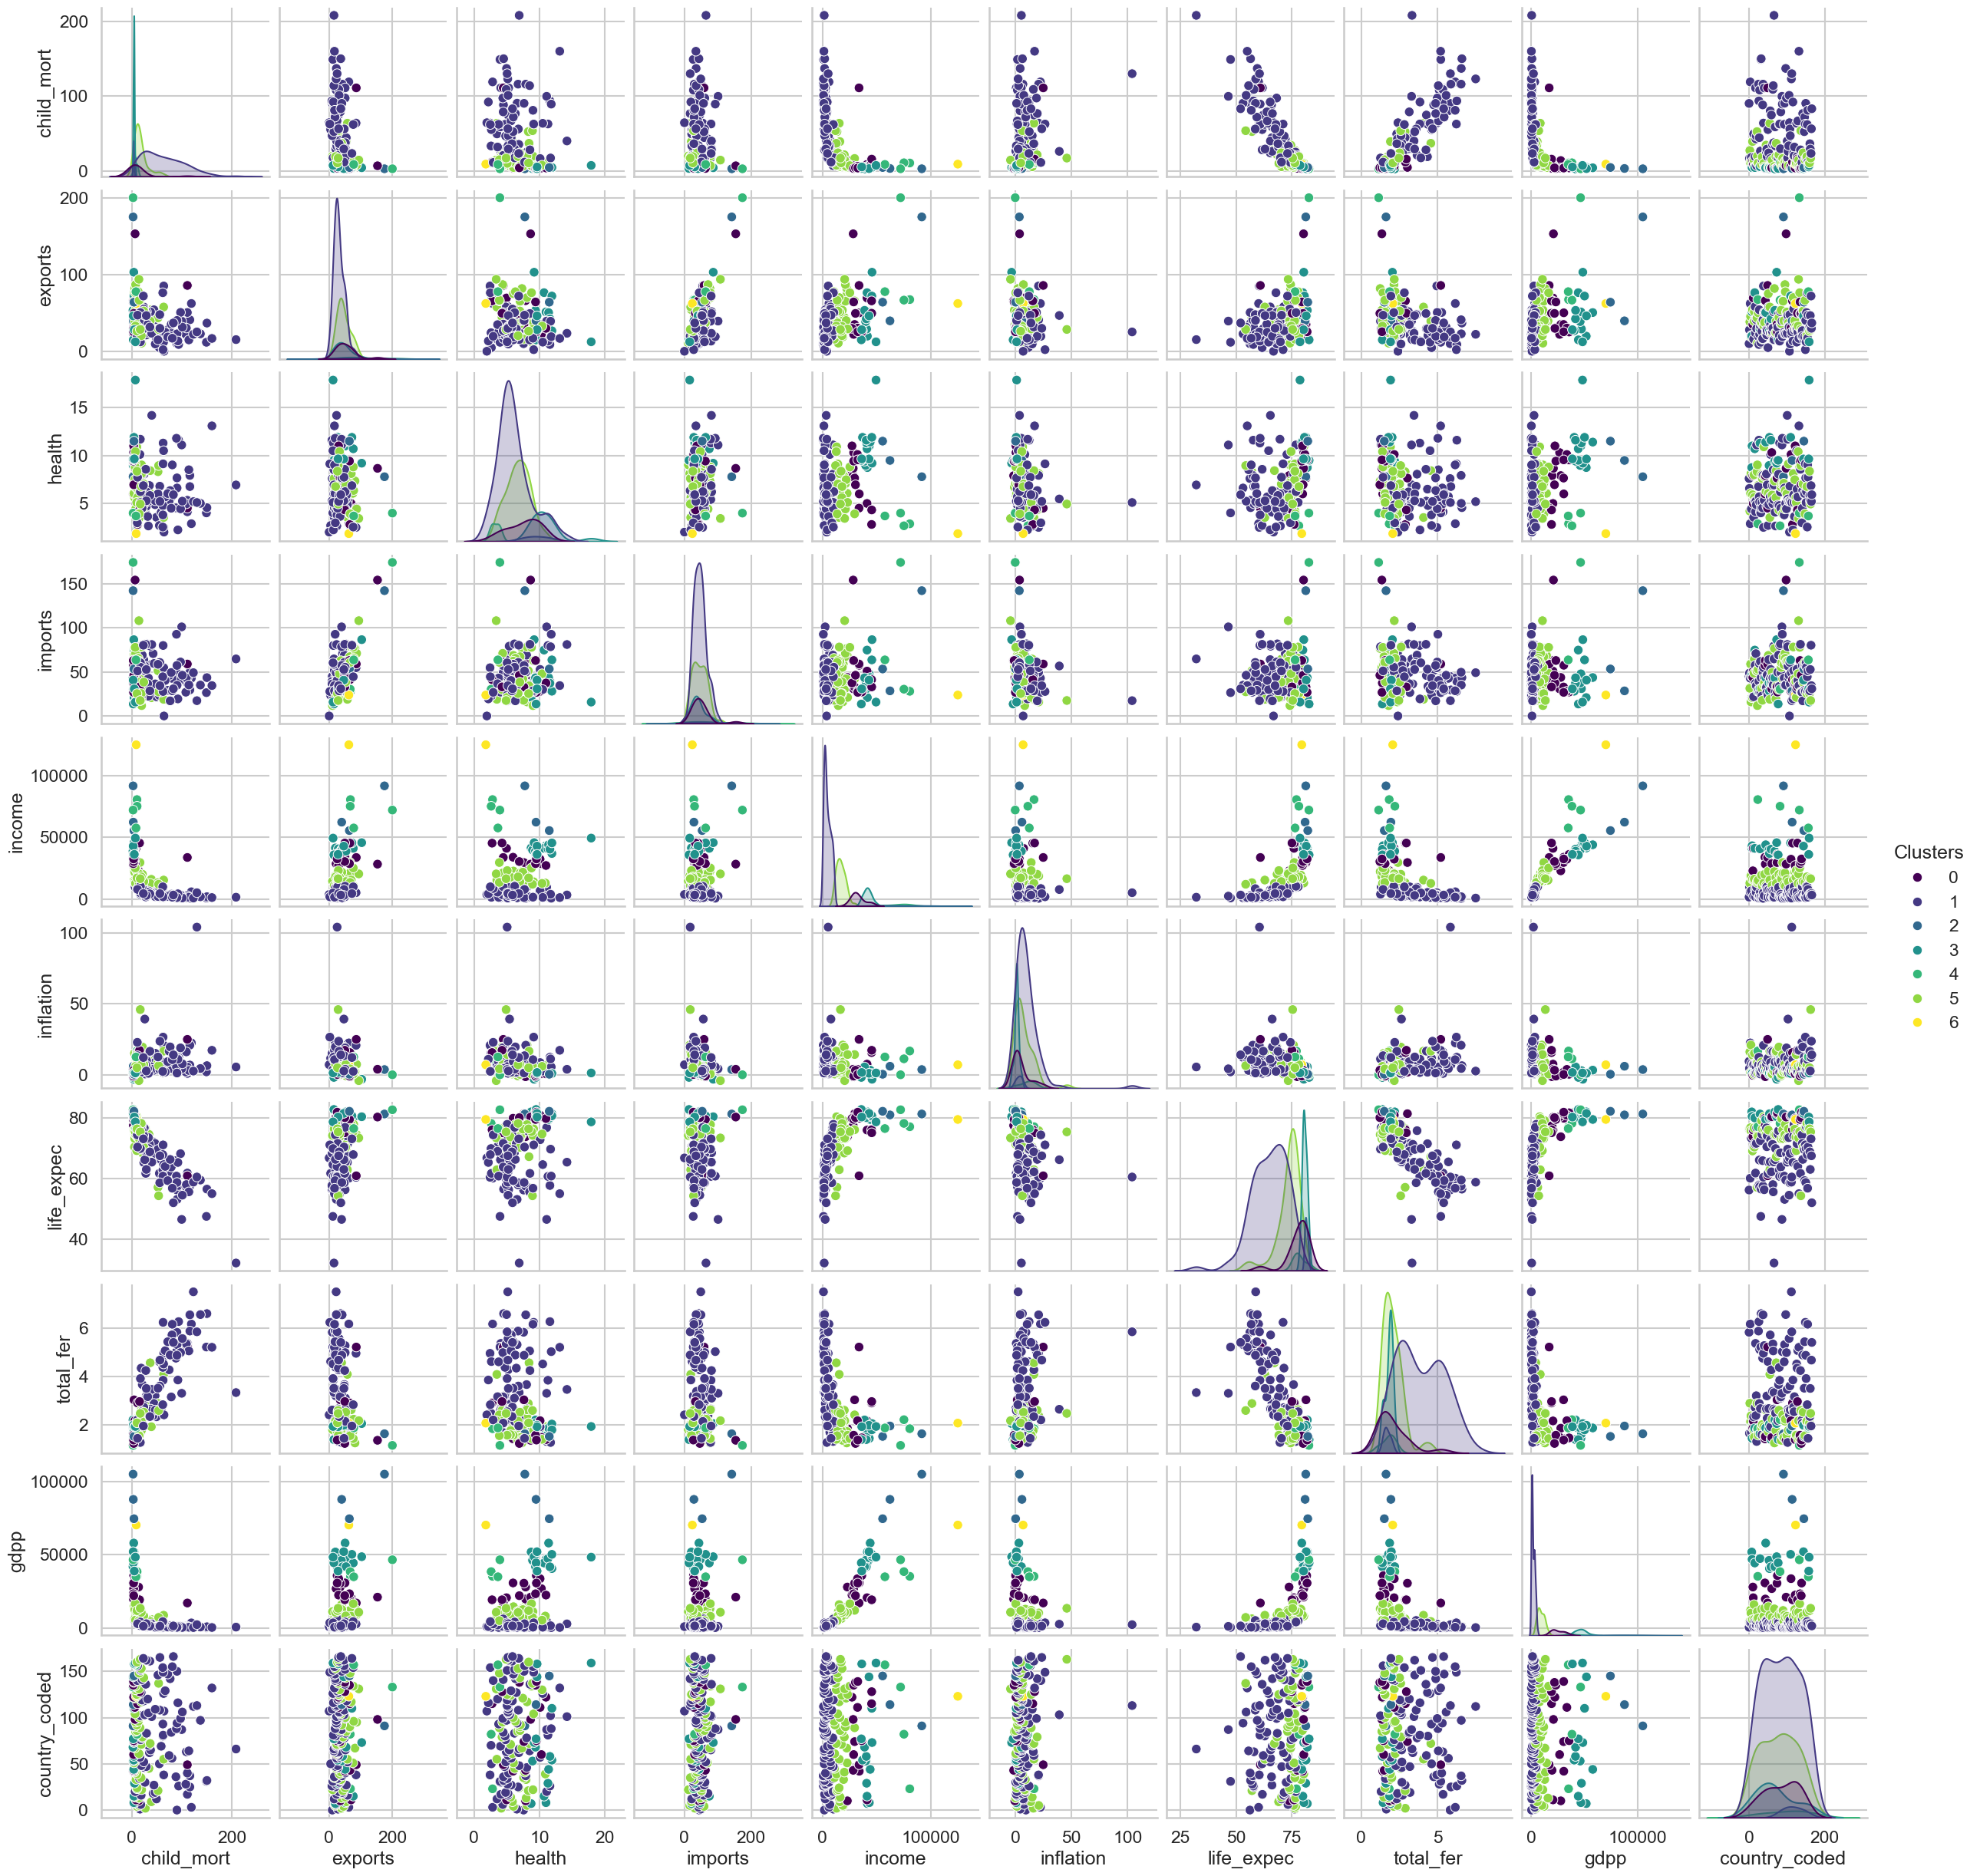

In [14]:
sns.pairplot(resulting_df, hue='Clusters', palette ='viridis')